# Início da Imersão - Aula 03

- Local da base de dados: https://github.com/alura-cursos/imersaodados3/
- Descrição da base de dados:
  - Cada linha representa um tratamento (Culturas de células). Cada tratamento é submetido a experimentos.


## Integração com o Gemini da Google
- Irei utilizar o conhecimento que adquiri durante a Imersão de IA que realizei para potencializar meus estudos nesse outro notebook

In [1]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

In [2]:
#Configurações iniciais
import google.generativeai as genai

# Adicionando a minha API Key do Google e configurando ela
GOOGLE_API_KEY=""
genai.configure(api_key=GOOGLE_API_KEY)

# Definindo configurações da geração dos dados
generation_config = {
  "candidate_count": 1,
  "temperature": 0.5,
}

# Definindo configurações de segurança
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }

# Definindo o modelo que será utilizado
model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config,
                                  safety_settings=safety_settings,)

## Importações

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("---------- Importações realizados com sucesso ----------")

---------- Importações realizados com sucesso ----------


## Código

### Consumo e tratamento do Dataset

#### Inicinado consumo da base de dados

In [4]:
url_dados = "https://github.com/alura-cursos/imersaodados3/raw/main/dados/dados_experimentos.zip?raw=true"

df_dados = pd.read_csv(url_dados, compression = "zip")

In [5]:
df_dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740




#### Renomeie as colunas tirando o hífen

In [6]:
df_dados.columns = df_dados.columns.str.replace("-", "")
df_dados

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


#### Modificando a base de dados

In [7]:
df_dados.rename(columns = {"droga": "composto"}, inplace = True)
df_dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Criando uma tabela de frequência

In [8]:
# Aqui estamos criando uma tabela de frequencia que relaciona dose com tempo
pd.crosstab(df_dados["dose"], df_dados["tempo"])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [9]:
# Aqui estamos criando uma tabela de frequencia que relaciona dose e tempo com tratamento
pd.crosstab([df_dados["dose"], df_dados["tempo"]], df_dados["tratamento"])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [10]:
# Aqui estamos normalizando a tabela acima pelo íncide para acharmos a proporção de cada linha
round(pd.crosstab([df_dados["dose"], df_dados["tempo"]], df_dados["tratamento"], normalize="index")*100, 2)

tratamento  com_controle  com_droga
dose tempo                         
D1   24             7.75      92.25
     48             7.88      92.12
     72             7.86      92.14
D2   24             7.85      92.15
     48             7.83      92.17
     72             7.85      92.15

In [11]:
# Estamos vendo a médias do gene 0 nessa tabela de frequência
pd.crosstab([df_dados["dose"], df_dados["tempo"]], df_dados["tratamento"], values=df_dados["g0"], aggfunc="mean")

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

### Gráficos

#### Criando um gráfico de dispersão
- Esse gráfico num plano cartesiano funciona como um coordenada, ele pega as linhas de g0 e g3, pega os valores e marcas no plano cartesiano como se fosse as coordenandas

##### Teste 1
- Nesse gráfico de dispersão não conseguimos tirar muitas informações

<Axes: xlabel='g0', ylabel='g3'>

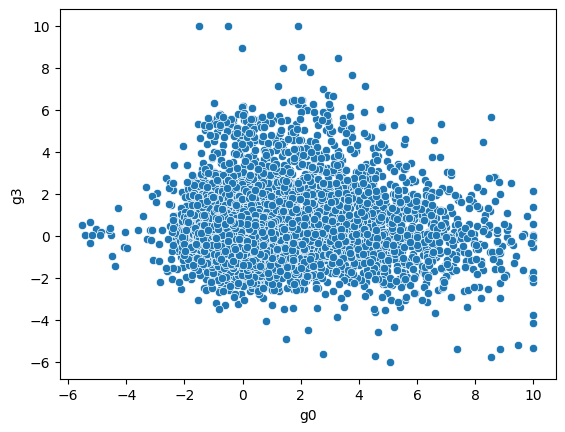

In [12]:
sns.scatterplot(x="g0", y="g3", data=df_dados)

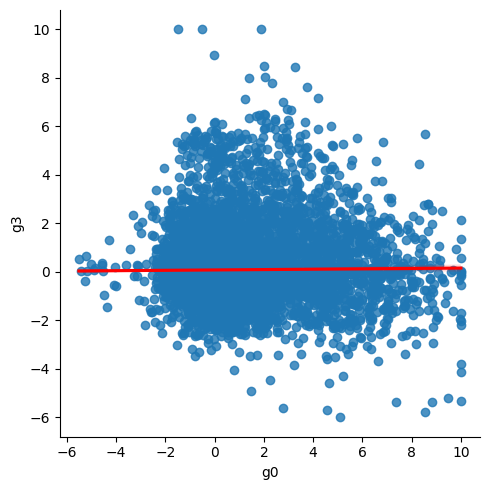

In [13]:
sns.lmplot(data=df_dados, x="g0", y="g3", line_kws={"color": "red"})

##### Teste 2
- Mas nesse gráfico conseguimos tirar algumas conclusões. Percebemos que quando g0 aumenta o g8 diminui

<Axes: xlabel='g0', ylabel='g8'>

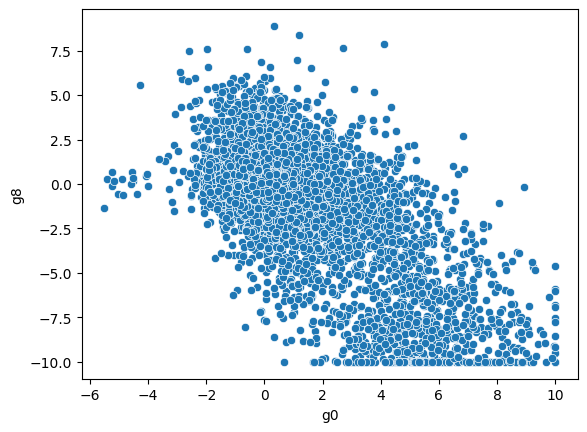

In [14]:
sns.scatterplot(x="g0", y="g8", data=df_dados)

- Melhorando a visualização:

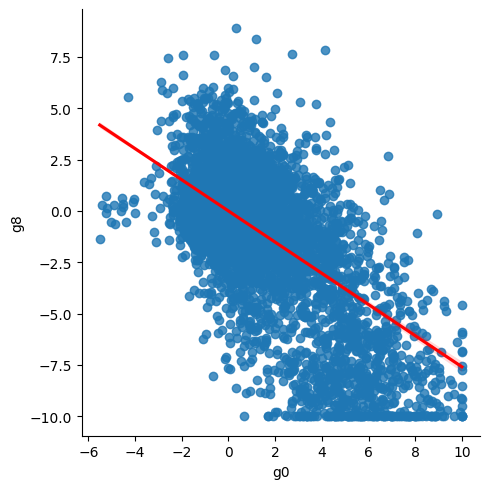

In [15]:
sns.lmplot(data=df_dados, x="g0", y="g8", line_kws={"color": "red"})

- Vendo a relação do g0 e g8 em ralação a coluna tratamento e a linha de tempo

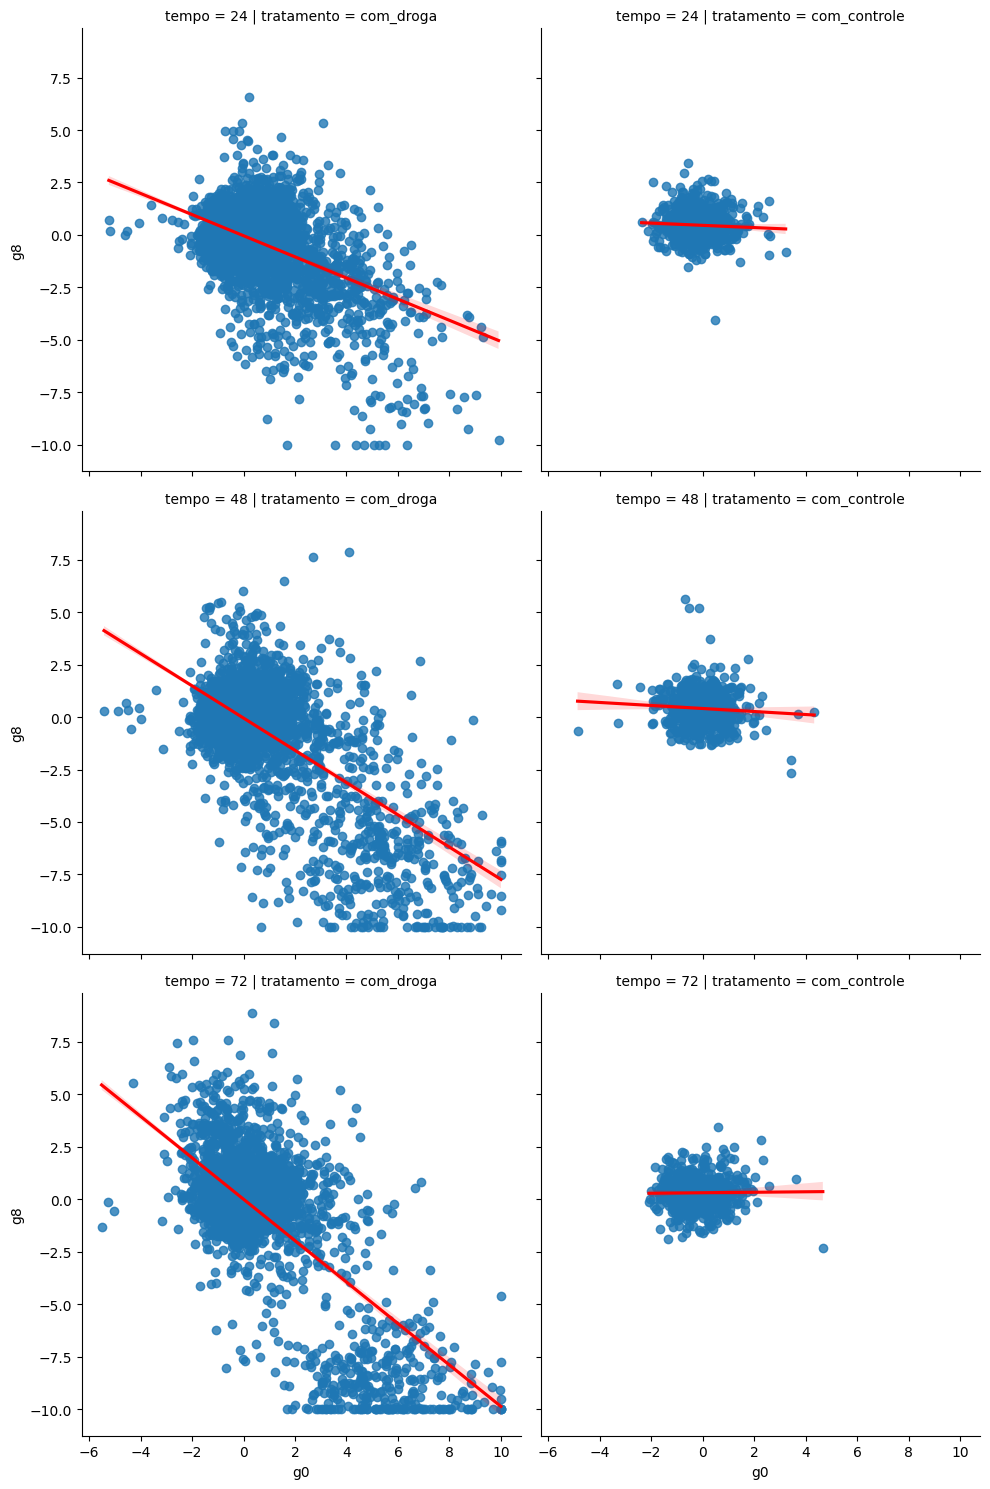

In [16]:
sns.lmplot(data=df_dados, x="g0", y="g8", line_kws={"color": "red"}, col="tratamento", row="tempo")

#### Correlação dos genes
- Quando temos correlações próxima de -1 ou +1 temos correlação próximas entre os genes, se tivermos correlação próxima a 0 pouca correlação
- Quando temos valores negativos são que eles são inversamente proporcionais, ou seja, se um aumenta o outro diminui
- Quando temos valores positivos são que eles são diretamente proporcionais, ou seja, se um aumenta o outro também aumenta

In [17]:
df_dados.loc[:, "g0" : "g771"].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


##### Mapa de calor de correlação entre os genes - Matriz de correlação

<Axes: >

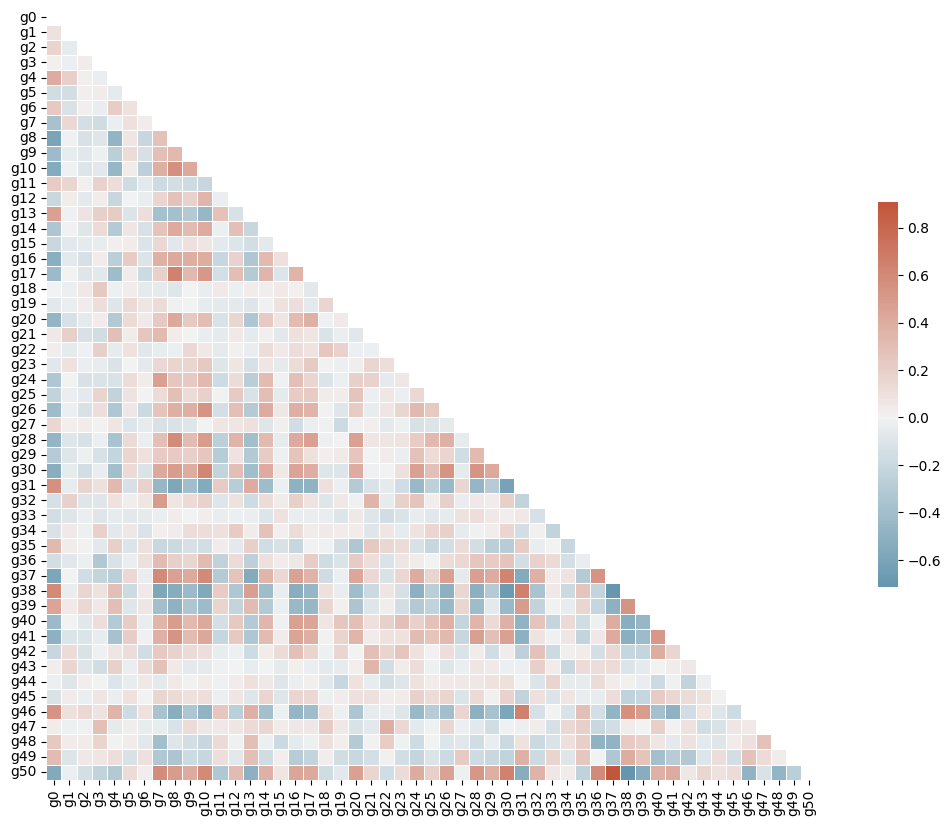

In [18]:
# font: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = df_dados.loc[:, "g0" : "g50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Testando a correlação entre o g37 e o g50 que pelo mapa de calor percebe-se que eles tem uma correlação diretamente proporcional

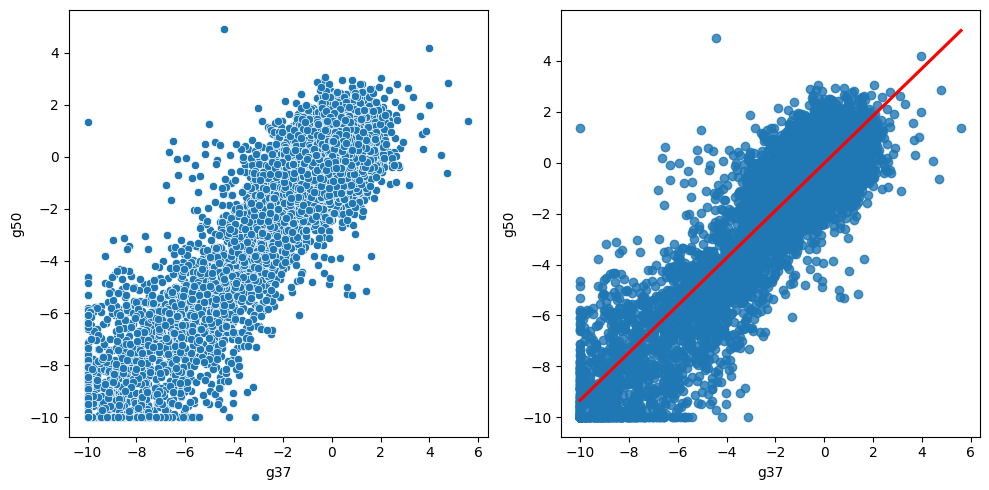

In [19]:
# Criando uma figura com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primeiro gráfico: scatter plot
sns.scatterplot(data=df_dados, x="g37", y="g50", ax=ax1)

# Segundo gráfico: lmplot
sns.regplot(data=df_dados, x="g37", y="g50", line_kws={"color": "red"}, ax=ax2)

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()


##### Testando a correlação entre o g37 e o g50 que pelo mapa de calor percebe-se que eles tem uma correlação diretamente proporcional com a coluna de tratamento e a linha de tempo

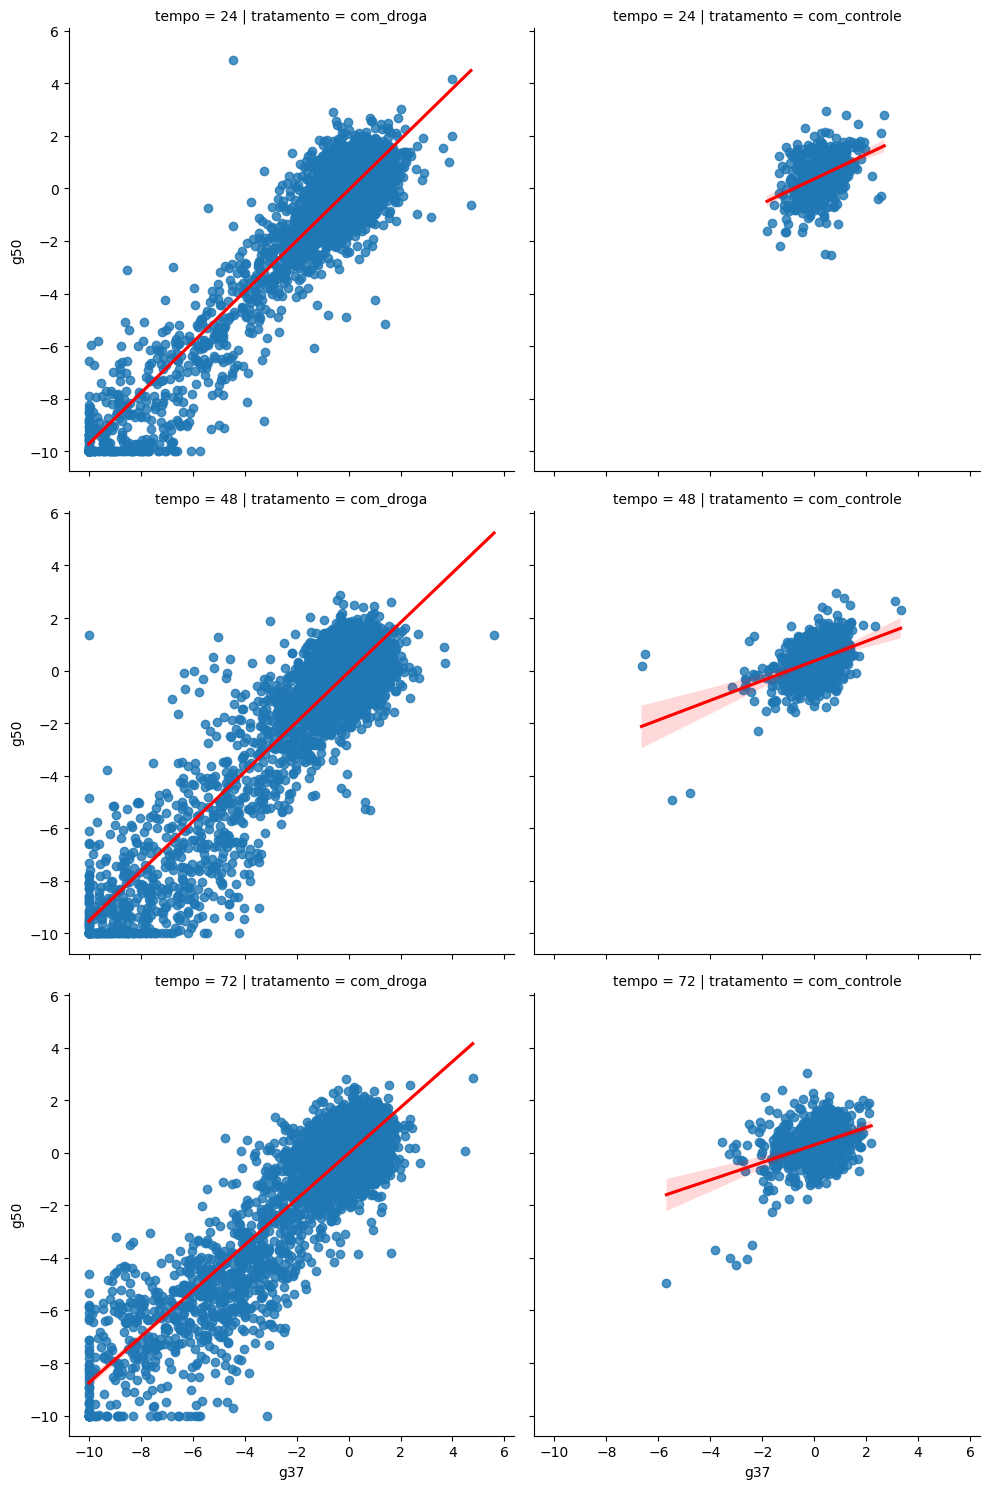

In [20]:
sns.lmplot(data=df_dados, x="g37", y="g50", line_kws={"color": "red"}, col="tratamento", row="tempo")

##### Testando a correlação entre o g37 e o g38 que pelo mapa de calor percebe-se que eles tem uma correlação inversamente proporcional

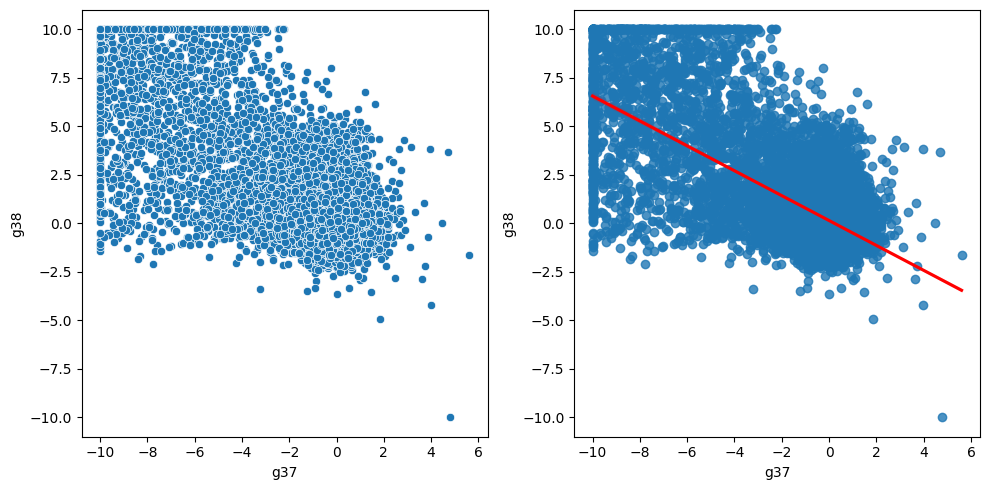

In [21]:
# Criando uma figura com 1 linha e 2 colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primeiro gráfico: scatter plot
sns.scatterplot(data=df_dados, x="g37", y="g38", ax=ax1)

# Segundo gráfico: lmplot
sns.regplot(data=df_dados, x="g37", y="g38", line_kws={"color": "red"}, ax=ax2)

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()


##### Testando a correlação entre o g37 e o g38 que pelo mapa de calor percebe-se que eles tem uma correlação inversamente proporcional com a coluna de tratamento e a linha de tempo

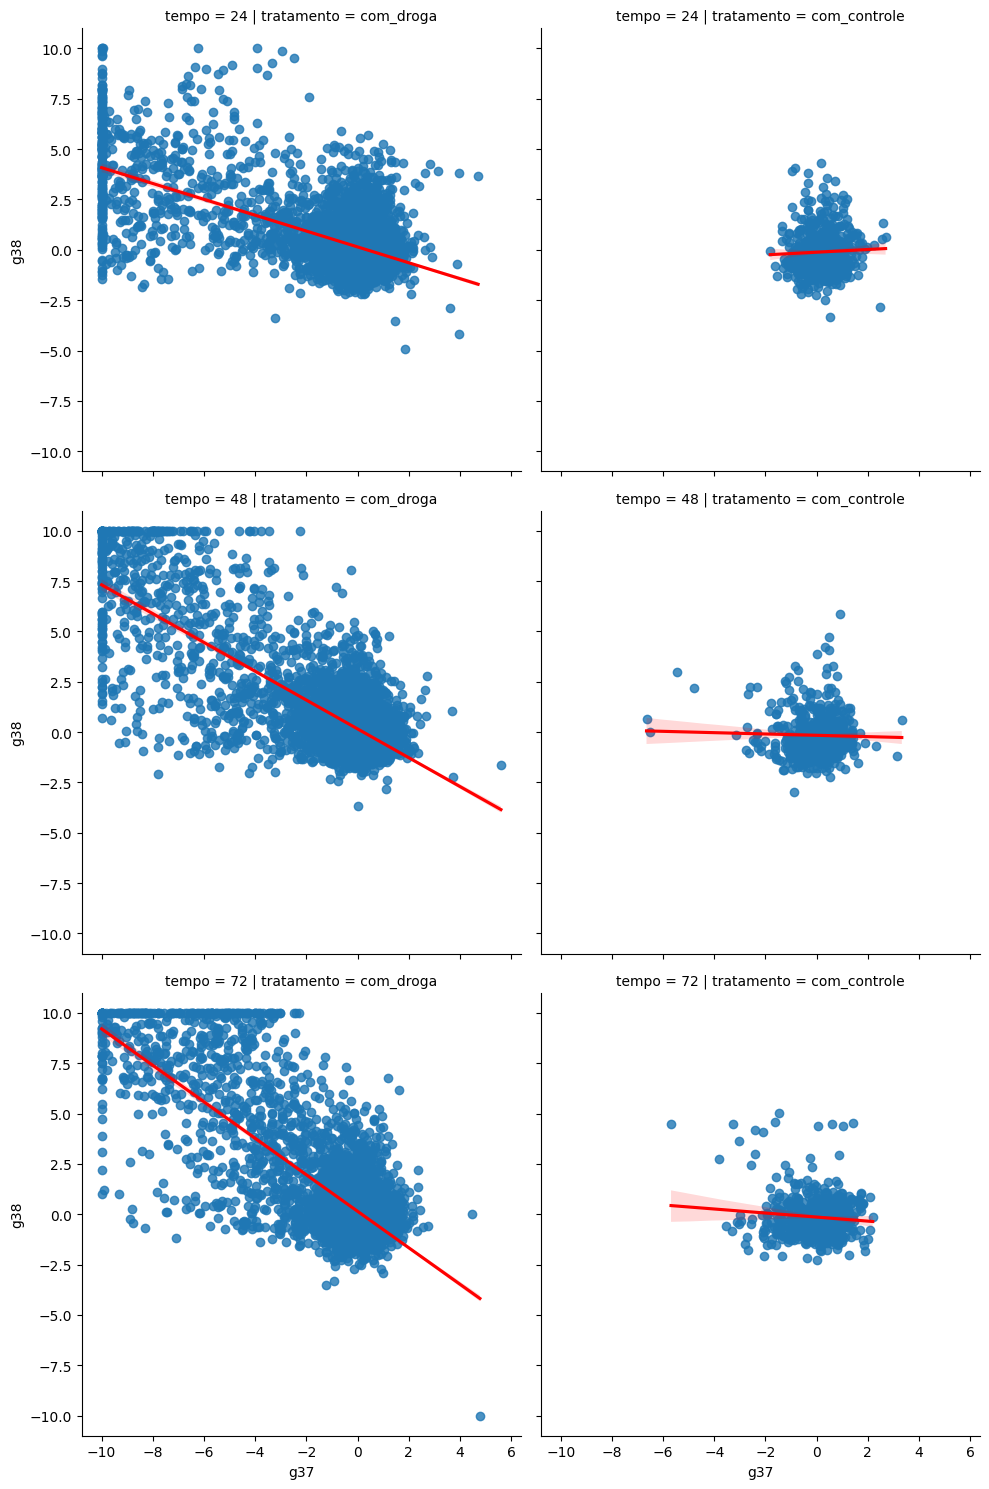

In [22]:
sns.lmplot(data=df_dados, x="g37", y="g38", line_kws={"color": "red"}, col="tratamento", row="tempo")

#### Correlação dos tipos celulares

##### Mapa de calor de correlação entre tipos celulares - Matriz de correlação

<Axes: >

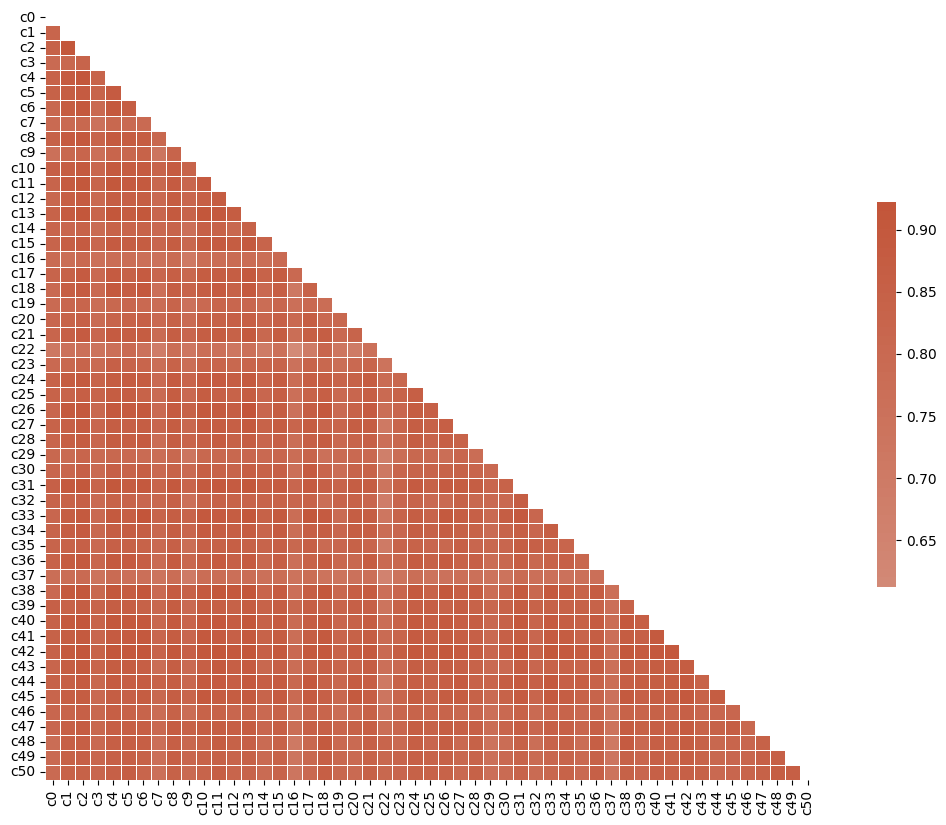

In [23]:
# font: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr_cel = df_dados.loc[:, "c0" : "c50"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_cel, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_cel, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafios



### 1.   Criar uma tabela de frequência com pd.groupby()
`groupby(['dose', 'tempo']):` Agrupa o DataFrame df_dados pelas colunas 'dose' e 'tempo'.

`.size():` Conta o número de ocorrências em cada grupo formado pelas combinações de 'dose' e 'tempo'.

`.unstack(fill_value=0):` Converte o resultado em um DataFrame, onde as combinações de 'tempo' se tornam colunas e preenche valores ausentes com zero.




In [24]:
df_dados.groupby(['dose', 'tempo']).size().unstack(fill_value=0)

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [25]:
df_dados.groupby(['dose', 'tempo', "tratamento"]).size().unstack(fill_value=0)

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580



### 2.   Normalizar o crosstab() pela coluna
`pd.crosstab:` Chama a função para criar uma tabela de contingência.

`[df_dados["dose"], df_dados["tempo"]]:` Define as colunas 'dose' e 'tempo' como índice da tabela. Cada combinação única de 'dose' e 'tempo' formará uma linha na tabela.

`df_dados["tratamento"]:` Define a coluna 'tratamento' como as colunas da tabela. Cada valor único em 'tratamento' formará uma coluna na tabela.

`normalize="columns":` Normaliza as contagens em proporções dentro de cada coluna.

In [26]:
round(pd.crosstab([df_dados["dose"], df_dados["tempo"]], df_dados["tratamento"], normalize="columns")*100, 2)

tratamento  com_controle  com_droga
dose tempo                         
D1   24            16.13      16.33
     48            18.38      18.28
     72            16.45      16.40
D2   24            16.35      16.32
     48            16.35      16.36
     72            16.35      16.31



### 3. Explore outros tipos de aggfunc
fonte: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html#pandas.crosstab

`aggfunc="sum":` Soma dos valores.

`aggfunc="mean":` Média dos valores.

`aggfunc="min":` Valor mínimo.

`aggfunc="max":` Valor máximo.

`aggfunc="median":` Mediana dos valores.

`aggfunc="std":` Desvio padrão dos valores.

`staggfunc="var":` Variância dos valores.


In [27]:
# values array de valores a serem agregados de acordo com os fatores. Requer que a aggfunc seja especificada.
pd.crosstab([df_dados["dose"], df_dados["tempo"]], df_dados["tratamento"], values=df_dados["g0"], aggfunc=["min", "max", "mean"]) # ou aggfunc="max"

min                    max                   mean  \
tratamento com_controle com_droga com_controle com_droga com_controle   
dose tempo                                                              
D1   24          -2.370    -5.183        3.226     9.908    -0.251760   
     48          -3.276    -5.420        3.423    10.000    -0.122773   
     72          -2.086    -5.261        2.584     9.355    -0.295271   
D2   24          -2.135    -5.233        2.601     7.167     0.010754   
     48          -4.859    -4.567        4.335    10.000     0.013174   
     72          -1.909    -5.513        4.670    10.000     0.070250   

                      
tratamento com_droga  
dose tempo            
D1   24     0.367996  
     48     0.412469  
     72     0.286250  
D2   24     0.115253  
     48     0.214480  
     72     0.253439



### 6.   Estudar o código que plot a matriz de correlação do heatmap

# Explicação do Código

## 1. Calculando a Correlação

```python
corr = df_dados.loc[:, "g0" : "g50"].corr()
df_dados.loc[:, "g0" : "g50"]: Seleciona todas as linhas (:) e as colunas que vão de g0 até g50.
.corr(): Calcula a matriz de correlação para as colunas selecionadas. A matriz de correlação mostra como cada par de colunas está correlacionado, com valores variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita).

## 2. Gerando uma Máscara para o Triângulo Superior

```python
mask = np.triu(np.ones_like(corr, dtype=bool))
np.ones_like(corr, dtype=bool): Cria uma matriz do mesmo tamanho que corr, preenchida com True (porque dtype=bool).
np.triu(...): Mantém apenas os elementos no triângulo superior da matriz (inclusive a diagonal), definindo os elementos abaixo do triângulo superior como False. Isso é usado para mascarar o triângulo inferior da matriz de correlação quando desenhamos o heatmap.

## 3. Configurando a Figura do Matplotlib

```python
f, ax = plt.subplots(figsize=(16, 10))
plt.subplots(figsize=(16, 10)): Cria uma nova figura e um eixo (ax) para o plot, com um tamanho de 16 polegadas de largura e 10 polegadas de altura.

## 4. Gerando um Mapa de Cores Personalizado

```python
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.diverging_palette(230, 20, as_cmap=True): Cria uma paleta de cores divergentes, que é adequada para dados centrados (como uma matriz de correlação, que é centrada em torno de zero). Os números 230 e 20 representam os dois extremos do espectro de cores. O parâmetro as_cmap=True faz com que a paleta seja retornada como um mapa de cores que pode ser usado em plots.

## 5. Desenhando o Heatmap

```python
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(corr, ...): Desenha um heatmap da matriz de correlação corr.
mask=mask: Aplica a máscara que criamos anteriormente, ocultando o triângulo inferior da matriz.
cmap=cmap: Usa o mapa de cores personalizado criado anteriormente.
center=0: Centraliza o mapa de cores em torno de zero.
square=True: Define que cada célula do heatmap deve ser quadrada.
linewidths=.5: Define a largura das linhas que separam as células do heatmap.
cbar_kws={"shrink": .5}: Configura a barra de cores (color bar), definindo que ela deve ser encolhida para 50% do seu tamanho normal.
